In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import warnings

warnings.filterwarnings(action = 'ignore')

In [5]:
df1 = pd.read_csv('../data/행정동_기준_동별데이터.csv')
df2 = pd.read_csv('행정동_데이터.csv')
pd.set_option('display.max_columns',25)

In [6]:
df1

,Unnamed: 0,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,ANIMAL_HSPT_NUM,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM,GU,DONG,DONG_CODE
0,2,0.333333,0.333333,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.000000,18.000000,4.000000,5.666667,39.666667,1.000000,56.666667,7.333333,2.000000,0.0,종로구,청운효자동,1111051500
1,12,1.333333,7.333333,0.0,0.000000,0.0,10.000000,0.000000,18.0,3.000000,19.000000,2.000000,11.666667,100.666667,5.000000,41.666667,10.333333,10.000000,0.0,종로구,사직동,1111053000
2,24,0.000000,1.000000,1.0,0.000000,0.0,10.000000,0.000000,3.0,0.000000,2.000000,0.000000,7.000000,52.000000,1.000000,22.000000,1.000000,1.000000,0.0,종로구,삼청동,1111054000
3,31,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,2.0,2.000000,24.000000,6.000000,5.000000,30.000000,5.000000,41.000000,5.000000,4.000000,0.0,종로구,부암동,1111055000
4,34,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,5.0,5.000000,28.000000,0.000000,7.000000,36.000000,0.000000,21.000000,10.000000,3.000000,0.0,종로구,평창동,1111056000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,762,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,5.333333,6.000000,47.666667,6.666667,52.000000,4.000000,19.333333,0.0,강동구,성내2동,1174065000
422,763,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,5.333333,6.000000,47.666667,6.666667,52.000000,4.000000,19.333333,0.0,강동구,성내3동,1174066000
423,764,0.000000,2.000000,0.0,1.000000,0.0,20.000000,1.000000,18.0,9.000000,100.000000,16.000000,9.000000,63.000000,10.000000,119.000000,10.000000,38.000000,0.0,강동구,길동,1174068500
424,765,0.500000,0.000000,0.0,0.000000,0.5,0.000000,0.000000,4.0,3.000000,38.000000,3.000000,5.500000,17.500000,2.000000,32.500000,0.000000,8.500000,0.0,강동구,둔촌1동,1174069000


In [7]:
df2

,Unnamed: 0,구이름,행정동,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,ANIMAL_HSPT_NUM,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM
0,0,종로구,청운효자동,0.111111,0.111111,0.0,1.000000,0.00,0.000000,0.000000,0.000000,0.000000,18.000000,4.000000,4.555556,37.222222,0.333333,54.888889,7.111111,2.000000,0.0
1,1,종로구,사직동,1.111111,7.111111,0.0,0.000000,0.00,10.000000,0.000000,18.000000,3.000000,19.000000,2.000000,10.555556,98.222222,4.333333,39.888889,10.111111,10.000000,0.0
2,2,종로구,삼청동,0.000000,1.000000,1.0,0.000000,0.00,10.000000,0.000000,3.000000,0.000000,2.000000,0.000000,7.000000,52.000000,1.000000,22.000000,1.000000,1.000000,0.0
3,3,종로구,부암동,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,2.000000,2.000000,24.000000,6.000000,5.000000,30.000000,5.000000,41.000000,5.000000,4.000000,0.0
4,4,종로구,평창동,0.000000,1.000000,0.0,0.000000,0.00,0.000000,0.000000,5.000000,5.000000,28.000000,0.000000,7.000000,36.000000,0.000000,21.000000,10.000000,3.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,421,강동구,성내제2동,0.444444,0.444444,0.0,0.222222,0.00,5.555556,0.222222,3.333333,1.555556,21.111111,1.777778,2.000000,15.888889,2.222222,17.333333,1.333333,6.444444,0.0
422,422,강동구,성내제3동,0.444444,0.444444,0.0,0.222222,0.00,5.555556,0.222222,3.333333,1.555556,21.111111,1.777778,2.000000,15.888889,2.222222,17.333333,1.333333,6.444444,0.0
423,423,강동구,길동,0.000000,2.000000,0.0,1.000000,0.00,20.000000,1.000000,18.000000,9.000000,100.000000,16.000000,9.000000,63.000000,10.000000,119.000000,10.000000,38.000000,0.0
424,424,강동구,둔촌제1동,0.250000,0.000000,0.0,0.000000,0.25,0.000000,0.000000,2.000000,1.500000,19.000000,1.500000,2.750000,8.750000,1.000000,16.250000,0.000000,4.250000,0.0


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'SUBWAY_NUM'}>,
        <AxesSubplot:title={'center':'STARBUCKS_NUM'}>,
        <AxesSubplot:title={'center':'SPORT_NUM'}>],
       [<AxesSubplot:title={'center':'SAFE_DLVR_NUM'}>,
        <AxesSubplot:title={'center':'MC_NUM'}>,
        <AxesSubplot:title={'center':'KINDER_NUM'}>,
        <AxesSubplot:title={'center':'KIDS_NUM'}>],
       [<AxesSubplot:title={'center':'GYM_NUM'}>,
        <AxesSubplot:title={'center':'GOLF_NUM'}>,
        <AxesSubplot:title={'center':'ACADEMY_NUM'}>,
        <AxesSubplot:title={'center':'ANIMAL_HSPT_NUM'}>],
       [<AxesSubplot:title={'center':'BIKE_NUM'}>,
        <AxesSubplot:title={'center':'CAFE'}>,
        <AxesSubplot:title={'center':'CAR_SHR_NUM'}>,
        <AxesSubplot:title={'center':'CCTV_NUM'}>],
       [<AxesSubplot:title={'center':'CHILD_MED_NUM'}>,
        <AxesSubplot:title={'center':'CON_NUM'}>,
        <AxesSubplot:title={'center':'DPTM_NUM'}>,


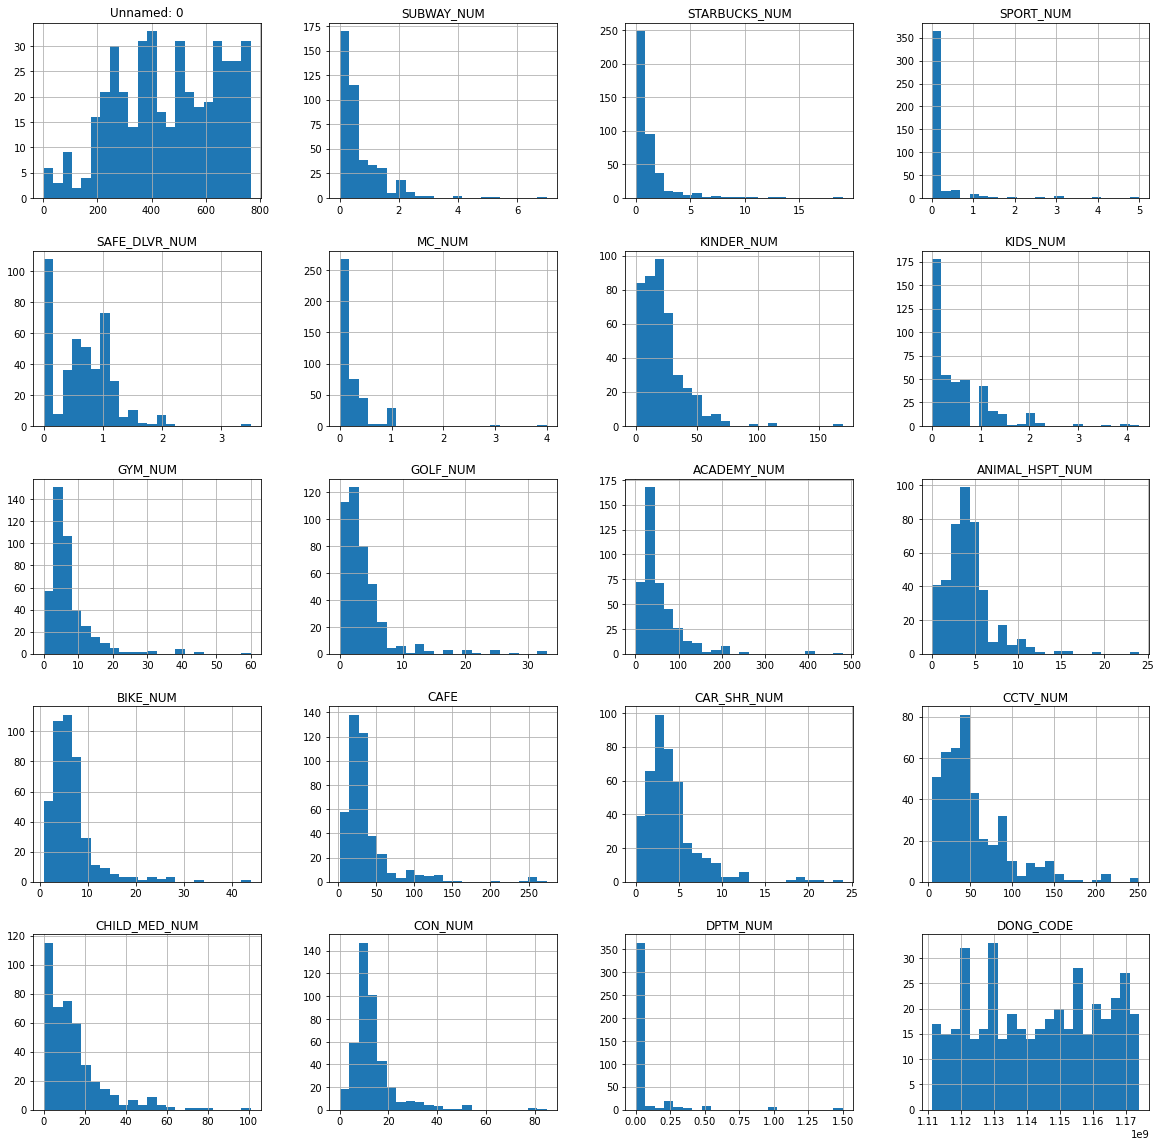

In [8]:
df1.hist(figsize = (20, 20), bins = 22, legend = False)

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'SUBWAY_NUM'}>,
        <AxesSubplot:title={'center':'STARBUCKS_NUM'}>,
        <AxesSubplot:title={'center':'SPORT_NUM'}>],
       [<AxesSubplot:title={'center':'SAFE_DLVR_NUM'}>,
        <AxesSubplot:title={'center':'MC_NUM'}>,
        <AxesSubplot:title={'center':'KINDER_NUM'}>,
        <AxesSubplot:title={'center':'KIDS_NUM'}>],
       [<AxesSubplot:title={'center':'GYM_NUM'}>,
        <AxesSubplot:title={'center':'GOLF_NUM'}>,
        <AxesSubplot:title={'center':'ACADEMY_NUM'}>,
        <AxesSubplot:title={'center':'ANIMAL_HSPT_NUM'}>],
       [<AxesSubplot:title={'center':'BIKE_NUM'}>,
        <AxesSubplot:title={'center':'CAFE'}>,
        <AxesSubplot:title={'center':'CAR_SHR_NUM'}>,
        <AxesSubplot:title={'center':'CCTV_NUM'}>],
       [<AxesSubplot:title={'center':'CHILD_MED_NUM'}>,
        <AxesSubplot:title={'center':'CON_NUM'}>,
        <AxesSubplot:title={'center':'DPTM_NUM'}>, 

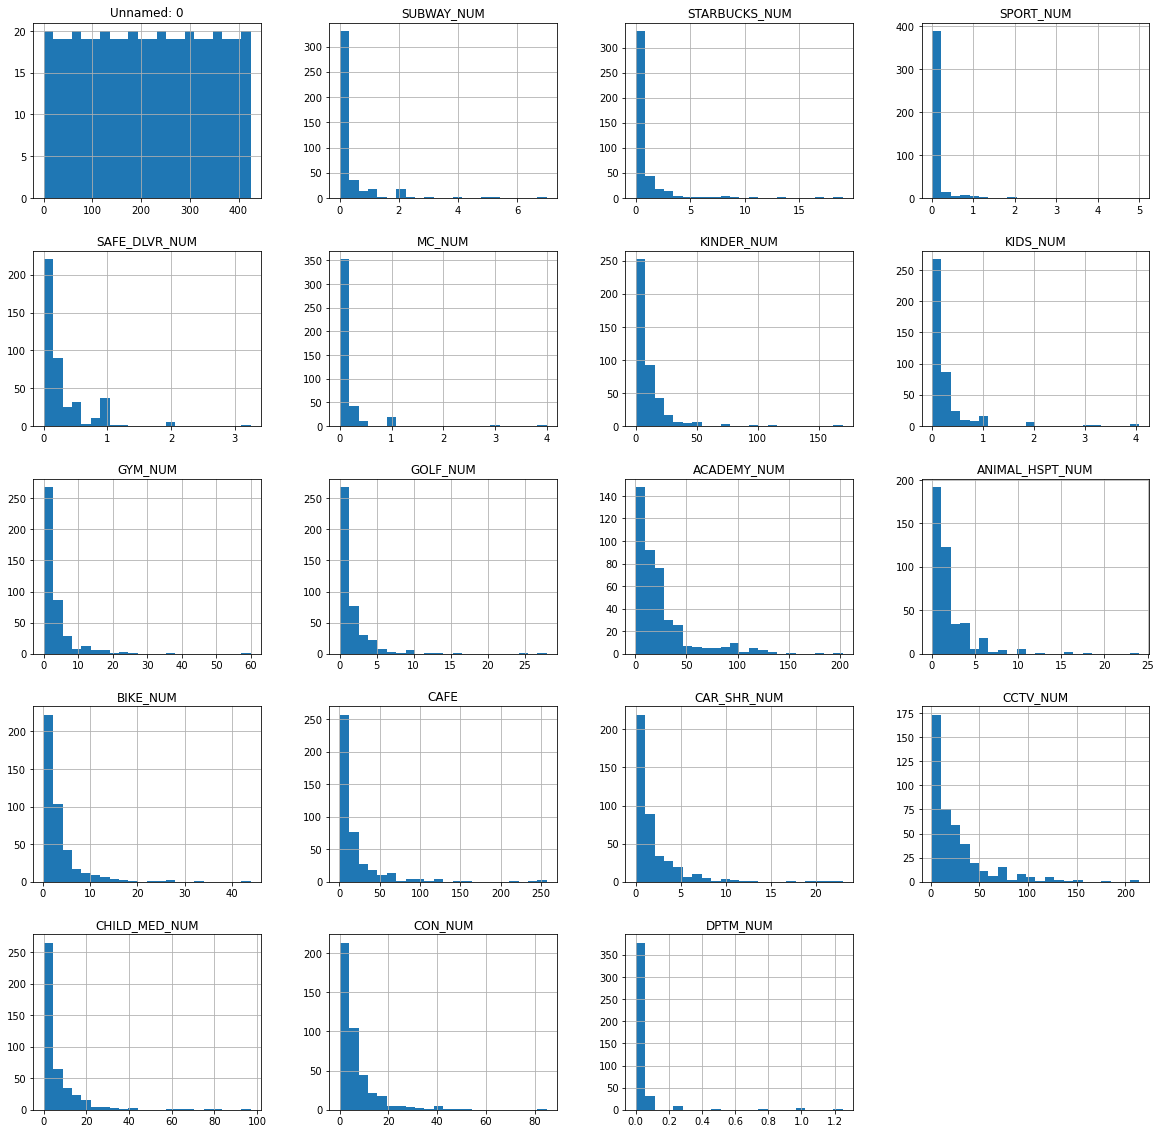

In [9]:
df2.hist(figsize = (20, 20), bins = 22, legend = False)